# Market Basket Analysis

Apriori algorithm is a supervised learning algorithm that is widely used in data mining. Apriori works by generating associations rules between itemsets. It is widely used in market basket analysis and understanding the customer buying behavior. Apriori algorithm is easy to implement but also it’s computationally expensive.

Support represents how frequently the items appear in the data.
Confidence represents how frequently the if(antecedents)-then(consequences) statements are found to be true.
Lift represents how much larger or smaller confidence than expected confidence is. If a lift is larger than 1.0, it implies that the relationship between the items is more significant than expected.The larger lift means more significant association.

In [15]:
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


color = sns.color_palette()

from mlxtend.frequent_patterns import apriori, association_rules

import warnings
warnings.filterwarnings('ignore')

In [16]:
Retail = pd.read_csv("Data_clean")

In [20]:
Retail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 361877
Data columns (total 13 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null object
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
Date           354345 non-null datetime64[ns]
Month          354345 non-null int64
Day            354345 non-null object
hours          354345 non-null int64
Day_no         354345 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(4), object(6)
memory usage: 37.8+ MB


In [17]:
Retail.dropna(axis = 0, subset =['InvoiceNo'], inplace = True) 
Retail['InvoiceNo'] = Retail['InvoiceNo'].astype('str') 
  
# Dropping all transactions which were done on credit 
Retail= Retail[~Retail['InvoiceNo'].str.contains('C')]

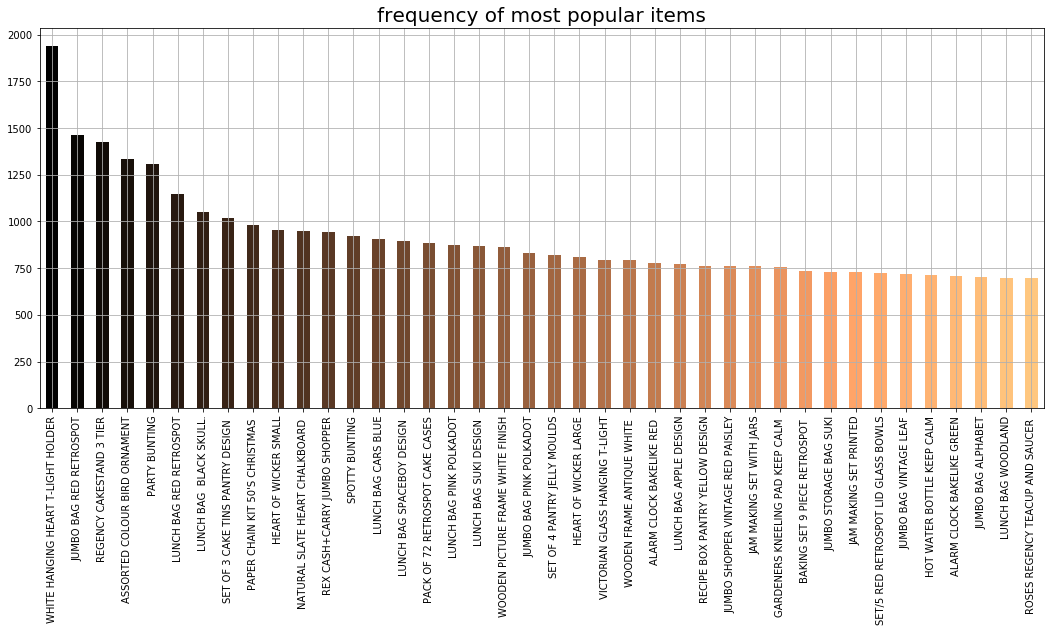

In [39]:
Description = Retail[Retail['Country']=='United Kingdom']['Description']
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
Description.value_counts().head(40).plot.bar(color = color)
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

# Feature Engineering

In [18]:
Retail['Date'] = pd.to_datetime(Retail['InvoiceDate'])
Retail['Month'] = Retail['Date'].dt.month
Retail['Day'] = Retail['Date'].dt.weekday_name
Retail['hours'] = Retail.Date.dt.hour
Retail['Day_no'] = Retail['Date'].dt.day

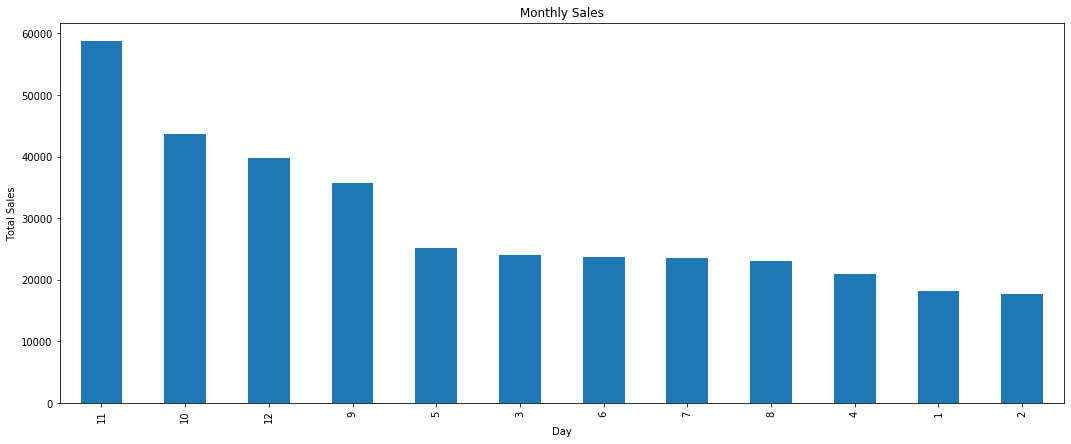

In [41]:
Retail['Month'].value_counts().plot(kind='bar')
plt.title('Monthly Sales')
plt.xlabel('Day')
plt.ylabel('Total Sales')
plt.show()

<span style="color:blue">*Interpretation:*</span>
- Sales are high in November and relatively high October,November and December and constane during all the other months of the year.



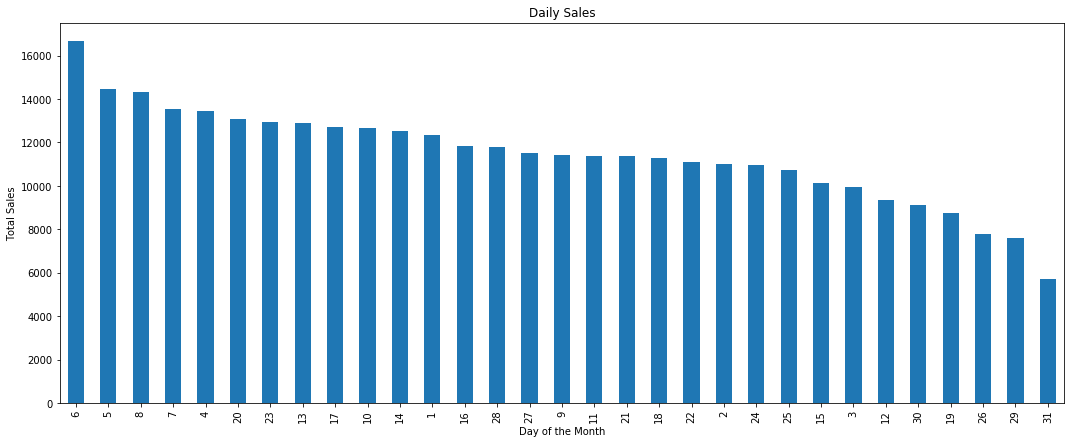

In [42]:
Retail['Day_no'].value_counts().plot(kind='bar')
plt.title('Daily Sales')
plt.xlabel('Day of the Month')
plt.ylabel('Total Sales')
plt.show()

<span style="color:blue">*Interpretation:*</span>
- Sales are higher on the 6th day of the Month and are dropping massively towards the end of the month.


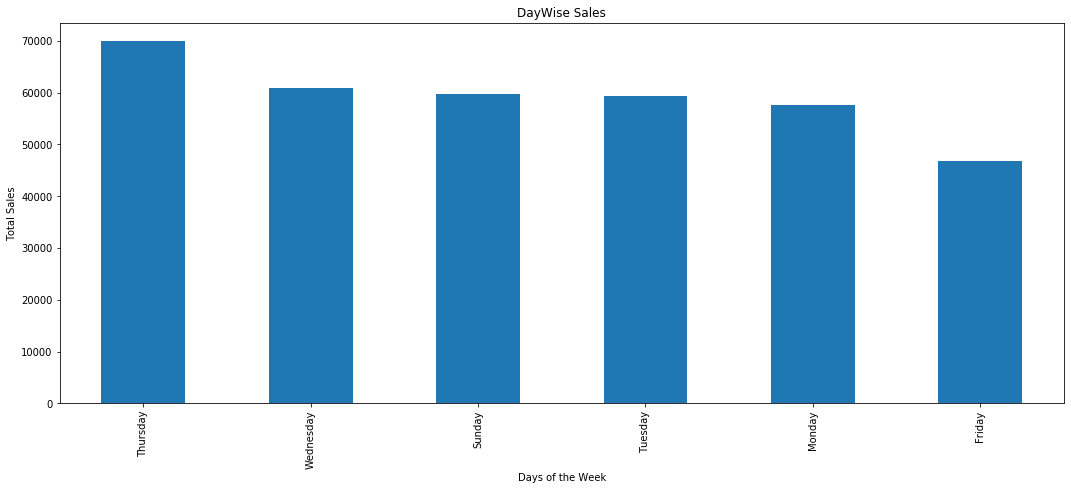

In [43]:
Retail['Day'].value_counts().plot(kind='bar')
plt.title('DayWise Sales')
plt.xlabel('Days of the Week')
plt.ylabel('Total Sales')
plt.show()

<span style="color:blue">*Interpretation:*</span>
- Sales are high on Thursday compared to other days of the week and there absolutely 0 transactions on Saturdays.
- Market  seems to be closed on Saturdays during 2010 to 2011

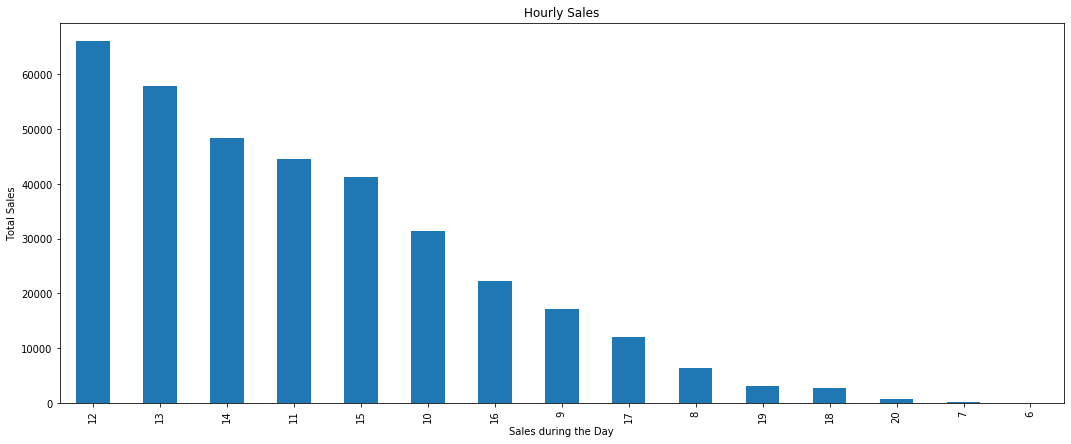

In [45]:
# Transactions per Hour
Retail['hours'].value_counts().plot(kind='bar')
plt.title('Hourly Sales')
plt.xlabel('Sales during the Day')
plt.ylabel('Total Sales')
plt.show()

<span style="color:blue">*Interpretation:*</span>
- More customers are visiting in after noon than closing and opening hours.


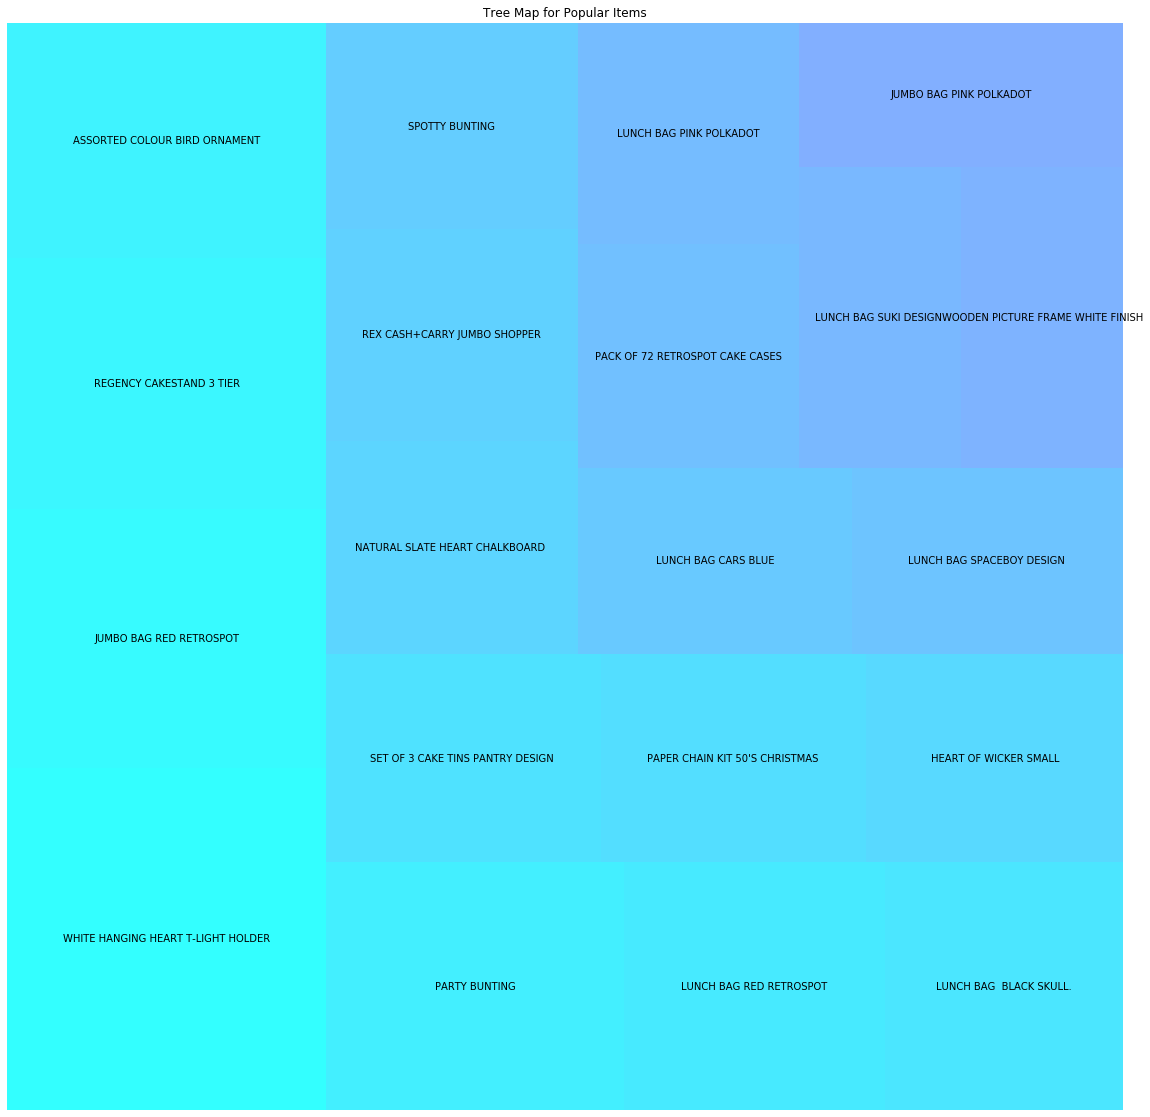

In [46]:
y = Description.value_counts().head(20).to_frame()
import squarify
plt.rcParams['figure.figsize'] = (20, 20)
color = plt.cm.cool(np.linspace(0, 1, 50))
squarify.plot(sizes = y.values, label = y.index, alpha=.8, color = color)
plt.title('Tree Map for Popular Items')
plt.axis('off')
plt.show()

In [23]:
# Grouping the transactions Item wise. Creating a dataframe with Invoice number as Index and Items as columns

In [5]:
basket_UK = (Retail[Retail['Country'] =="United Kingdom"] 
          .groupby(['InvoiceNo', 'Description'])['Quantity'] 
          .sum().unstack().reset_index().fillna(0) 
          .set_index('InvoiceNo'))

# Encoding Data

In [6]:
def hot_encode(x): 
    if(x<= 0): 
        return 0
    if(x>= 1): 
        return 1

In [7]:
basket_encoded = basket_UK.applymap(hot_encode) 
basket_UK = basket_encoded 

In [8]:
basket_UK.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
basket_UK.shape

(16649, 3844)

In [33]:
basket_UK1 = basket_UK.sample(frac=.5)

In [34]:
#from apyori import apriori

frq_items = apriori(basket_UK1, min_support = 0.01, use_colnames = True) 
rules = association_rules(frq_items, metric ="lift", min_threshold = 1) 
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
print(rules.head()) 

                                            antecedents  \
154                                 (HERB MARKER THYME)   
1005  (WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...   
155                              (HERB MARKER ROSEMARY)   
153                              (HERB MARKER ROSEMARY)   
1011  (PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...   

                               consequents  antecedent support  \
154                 (HERB MARKER ROSEMARY)            0.010572   
1005  (WOODEN STAR CHRISTMAS SCANDINAVIAN)            0.010572   
155                    (HERB MARKER THYME)            0.010812   
153                     (HERB MARKER MINT)            0.010812   
1011     (GREEN REGENCY TEACUP AND SAUCER)            0.014056   

      consequent support   support  confidence       lift  leverage  \
154             0.010812  0.010091    0.954545  88.284848  0.009977   
1005            0.024748  0.010091    0.954545  38.571050  0.009830   
155             0.010572  0.010091 

In [ ]:
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False]) 
rules.head()

If the rules for British transactions are analyzed a little deeper, it is seen that the British people buy different coloured tea-plates together. A reason behind this may be because typically the British enjoy tea very much and often collect different coloured tea-plates for different ocassions.

In the Market Basket Analysis, we found strong cross-product purchasing patterns between certain products! 
These results can be the basis for further analysis or discussion if we are able to know more about the retail chain, 
and can lead to opportunities for strategic pricing and promotions.

In [35]:
rules[ (rules['lift'] >= 6) &
       (rules['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
154,(HERB MARKER THYME),(HERB MARKER ROSEMARY),0.010572,0.010812,0.010091,0.954545,88.284848,0.009977,21.762134
1005,"(WOODEN TREE CHRISTMAS SCANDINAVIAN, WOODEN HE...",(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.010572,0.024748,0.010091,0.954545,38.571050,0.009830,21.455550
155,(HERB MARKER ROSEMARY),(HERB MARKER THYME),0.010812,0.010572,0.010091,0.933333,88.284848,0.009977,14.841422
153,(HERB MARKER ROSEMARY),(HERB MARKER MINT),0.010812,0.011173,0.010091,0.933333,83.538351,0.009971,14.832412
1011,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(GREEN REGENCY TEACUP AND SAUCER),0.014056,0.038443,0.012734,0.905983,23.566880,0.012194,10.227469
152,(HERB MARKER MINT),(HERB MARKER ROSEMARY),0.011173,0.010812,0.010091,0.903226,83.538351,0.009971,10.221608
994,"(POPPY'S PLAYHOUSE LIVINGROOM , POPPY'S PLAYHO...",(POPPY'S PLAYHOUSE KITCHEN),0.011173,0.018621,0.010091,0.903226,48.506139,0.009883,10.140918
1010,"(PINK REGENCY TEACUP AND SAUCER, REGENCY CAKES...",(ROSES REGENCY TEACUP AND SAUCER ),0.014176,0.043849,0.012734,0.898305,20.486278,0.012113,9.402150
615,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.024387,0.038443,0.021864,0.896552,23.321552,0.020927,9.295050
594,(WOODEN TREE CHRISTMAS SCANDINAVIAN),(WOODEN STAR CHRISTMAS SCANDINAVIAN),0.014897,0.024748,0.012975,0.870968,35.193862,0.012606,7.558205


In [36]:
frequent_itemsets = apriori(basket_UK1, min_support=0.02, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.040966,0.043128,0.026550,0.648094,15.027112,0.024783,2.719110
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.043128,0.040966,0.026550,0.615599,15.027112,0.024783,2.494879
2,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.044690,0.035440,0.026910,0.602151,16.990851,0.025326,2.424435
3,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.035440,0.044690,0.026910,0.759322,16.990851,0.025326,3.969246
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.030514,0.038443,0.025469,0.834646,21.711220,0.024295,5.815130


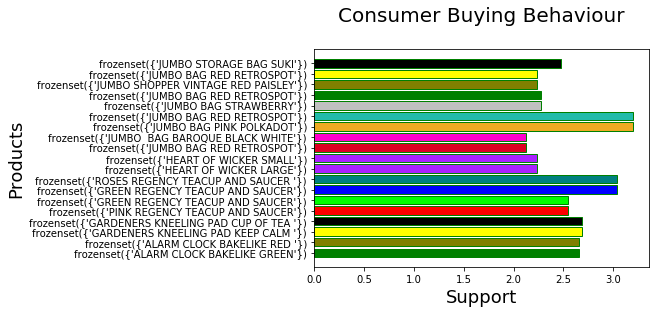

In [37]:
def simple_bar_chart(support,products):
    labels=np.array(products)
    colors = ['#008000','#808000','#FFFF00','#000000','#FF0000','#00FF00','#0000FF','#008080','#aa22ff','#aa22ff','#dd0022','#ff00cc','#eeaa22','#22bbaa','#C0C0C0']
    y_pos = np.arange(len(labels))
    x_pos = np.array(support)
    plt.barh(y_pos, x_pos, color=colors, align='center' ,edgecolor='green')
    plt.yticks(y_pos, labels)
    plt.ylabel('Products',fontsize=18)
    plt.xlabel('Support',fontsize=18)
    plt.title('Consumer Buying Behaviour\n',fontsize=20)
    plt.show()
    
support=rules.iloc[0:19]['support']*100
products=rules.iloc[0:19]['antecedents']
simple_bar_chart(support,products)

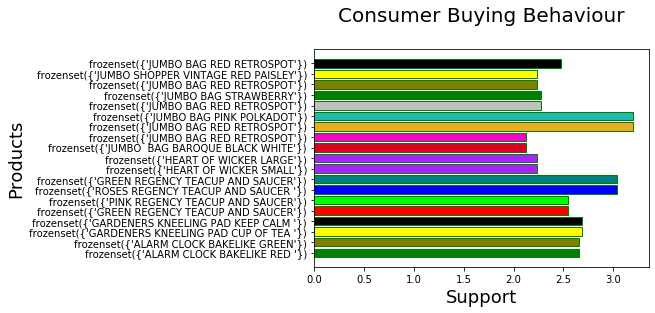

In [38]:
def simple_bar_chart(support,products):
    labels=np.array(products)
    colors = ['#008000','#808000','#FFFF00','#000000','#FF0000','#00FF00','#0000FF','#008080','#aa22ff','#aa22ff','#dd0022','#ff00cc','#eeaa22','#22bbaa','#C0C0C0']
    y_pos = np.arange(len(labels))
    x_pos = np.array(support)
    plt.barh(y_pos, x_pos, color=colors, align='center' ,edgecolor='green')
    plt.yticks(y_pos, labels)
    plt.ylabel('Products',fontsize=18)
    plt.xlabel('Support',fontsize=18)
    plt.title('Consumer Buying Behaviour\n',fontsize=20)
    plt.show()
    
support=rules.iloc[0:19]['support']*100
products=rules.iloc[0:19]['consequents']
simple_bar_chart(support,products)